# Title

## Introduction

## Preliminary Results

In [1]:
library(tidyverse)
library(tidymodels)
set.seed(12345)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.4     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

Rows: 42808 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): TYPE, HUNDRED_BLOCK, NEIGHBOURHOOD
dbl (7): YEAR, MONTH, DAY, HOUR, MINUTE, X, Y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


TYPE,YEAR,MONTH
<chr>,<dbl>,<dbl>
Theft from Vehicle,2003,2
Theft from Vehicle,2004,8
Theft from Vehicle,2012,7
Theft from Vehicle,2015,8
Theft from Vehicle,2020,7
Theft from Vehicle,2003,6


YEAR,summer_mean,winter_mean,diff_in_means
<dbl>,<dbl>,<dbl>,<dbl>
2003,73.33333,69.00000,4.333333
2004,55.00000,76.66667,-21.666667
2005,74.00000,76.00000,-2.000000
2006,41.33333,84.33333,-43.000000
2007,34.66667,51.00000,-16.333333
2008,40.66667,45.66667,-5.000000


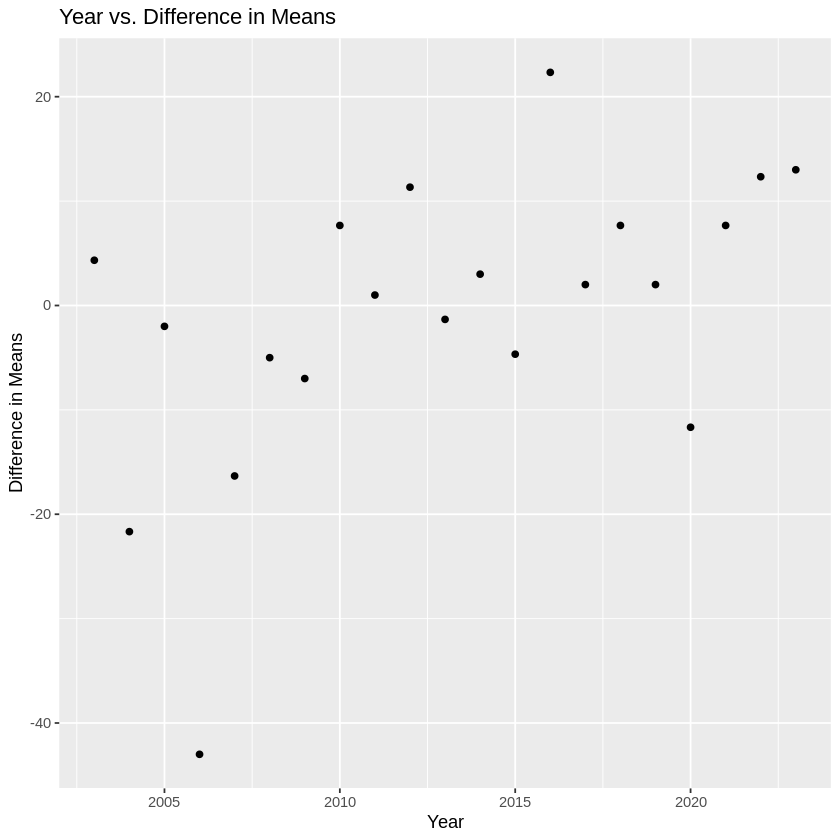

In [28]:
# Read and filter the data set
crime_data <- read_csv("data/crimedata_csv_Kitsilano_AllYears.csv") %>%
    filter(TYPE == "Theft from Vehicle", MONTH == 1 |MONTH == 2 |MONTH == 12 |MONTH == 6 |MONTH == 7 |MONTH == 8) %>%
    select(TYPE, YEAR, MONTH)
    
head(crime_data)

# Compute estimates
crime_estimates <- crime_data %>%
    group_by(YEAR) %>%
    summarize(summer_mean = sum(MONTH == 6 |MONTH == 7 |MONTH == 8)/3,
              winter_mean = sum(MONTH == 1 |MONTH == 2 |MONTH == 12)/3,
             diff_in_means = summer_mean - winter_mean)

head(crime_estimates)

# Plot the data
crime_plot <- crime_estimates %>%
    ggplot() +
    geom_point(aes (x = YEAR, y = diff_in_means)) +
    labs(x = "Year", y = "Difference in Means", title = "Year vs. Difference in Means")
crime_plot

## Method: Plan

## References